# Libraries and data

In [1]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/3. Holt-Winters

[WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/3. Holt-Winters'
C:\Users\HP 1O3O G2\TIME SERIES FORCASTING COURSE\Forecasting Models and Time Series for Business in Python\3. Holt-Winters


In [6]:
!pip install pandas

In [16]:
!pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 249.2 kB/s eta 0:00:00
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
     ------------------------------------ 163.0/163.0 kB 888.0 kB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 1.1 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 55.3/55.3 kB 3.0 MB/s eta 0:00:00


In [7]:
#libraries
import pandas as pd
import numpy as np

In [17]:
import matplotlib.pyplot as plt

In [18]:
#get the data
data = pd.read_csv("airmiles.csv", index_col = "Date")
data.head()

,airmiles
Date,
1/1/1996,30983174
1/2/1996,32147663
1/3/1996,38342975
1/4/1996,35969113
1/5/1996,36474391


In [19]:
data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y")
data.head(2)    

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663


#Preparation

In [20]:
data = data.asfreq("MS")
data.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq='MS')

<Axes: xlabel='Date'>

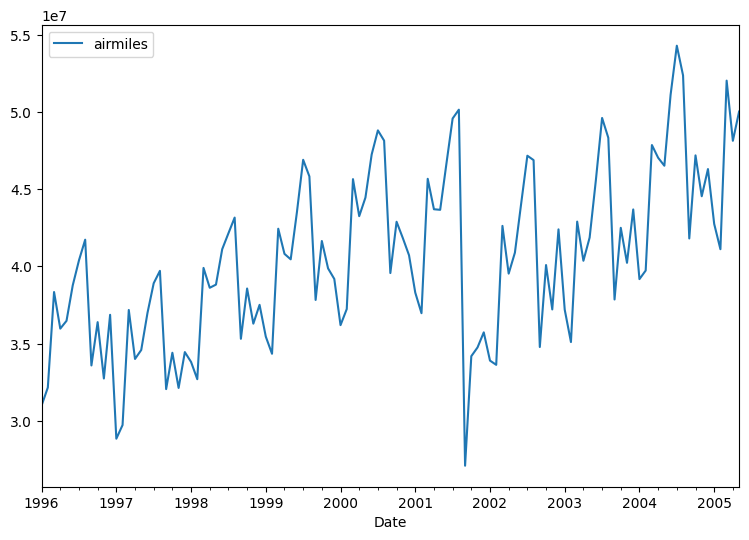

In [21]:
#Viz
data.plot(figsize = (9,6))

In [22]:
#training and test set
test_months = 12
training_set = data.iloc[:-test_months,:]
test_set = data.iloc[-test_months:,:]
test_set.head()

,airmiles
Date,
2004-06-01,51134050
2004-07-01,54317314
2004-08-01,52392985
2004-09-01,41816777
2004-10-01,47205665


In [30]:
!pip install statsmodels

  Using cached statsmodels-0.13.5-cp310-cp310-win_amd64.whl (9.1 MB)
     -----------------------                 25.7/42.5 MB 55.7 kB/s eta 0:05:01


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\HP 1O3O G2\anaconda3\envs\venv\lib\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
    yield
  File "C:\Users\HP 1O3O G2\anaconda3\envs\venv\lib\site-packages\pip\_vendor\urllib3\response.py", line 560, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\HP 1O3O G2\anaconda3\envs\venv\lib\site-packages\pip\_vendor\urllib3\response.py", line 526, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\HP 1O3O G2\anaconda3\envs\venv\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\HP 1O3O G2\anaconda3\envs\venv\lib\http\client.py", line 465, in read
    s = self.fp.read(amt)
  File "C:\Users\HP 1O3O G2\anaconda3\envs\venv\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\HP 1O3O G2\anaconda3\envs\venv\lib\s

#Holt Winters


In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(training_set['airmiles'],
                             trend = 'add',
                             seasonal = 'mul',
                             seasonal_periods = 12).fit()

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
#predictions 
predictions = model.forecast(steps = 12).rename("HW")
predictions

In [ ]:
#plotting
training_set['airmiles'].plot(figsize = (9,6), legend = True)
test_set['airmiles'].plot(legend = True)
predictions.plot(legend = True)

In [ ]:
#MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_set['airmiles'], predictions)